In [51]:
data = read.csv(file="rus_diffdiff.csv", header = TRUE, sep = ",")

In [52]:
data <- subset(data, X!= 0)
data$X <- NULL

In [72]:
dim(data)

[1]   12 1185

In [53]:
data$Крымc

[1]         NA         NA         NA         NA         NA         NA
 [7]         NA         NA         NA         NA -3350.8576  -496.9698

In [55]:
library('dtwclust')

In [56]:
pc <- tsclust(na.omit(t(data)), type = "partitional", k = 20L, 
              distance = "dtw_basic", centroid = "pam", 
              seed = 3247L, trace = TRUE,
              args = tsclust_args(dist = list(window.size = 5L)))


	Precomputing distance matrix...

Iteration 1: Changes / Distsum = 1155 / 42241106
Iteration 2: Changes / Distsum = 225 / 41134152
Iteration 3: Changes / Distsum = 77 / 40301711
Iteration 4: Changes / Distsum = 9 / 39933368
Iteration 5: Changes / Distsum = 24 / 39618686
Iteration 6: Changes / Distsum = 0 / 39618686

	Elapsed time is 0.435 seconds.



In [57]:
pc

partitional clustering with 20 clusters
Using dtw_basic distance
Using pam centroids

Time required for analysis:
   user  system elapsed 
  2.420   0.020   0.435 

Cluster sizes with average intra-cluster distance:

   size     av_dist
1    40  45939.5179
2    45  24937.9939
3    49  83526.4307
4    34   5462.6098
5    66   2647.6513
6    49 135473.0937
7    42  32847.9662
8    36   7479.3536
9   114    748.2048
10   79   3327.3305
11   46  22856.7532
12  186   7953.7692
13   25   3331.7963
14   23  53860.0844
15   44  54570.3642
16   37  11678.0082
17   39  34022.8390
18  105  17031.7185
19   24 509866.7556
20   72  21282.2996

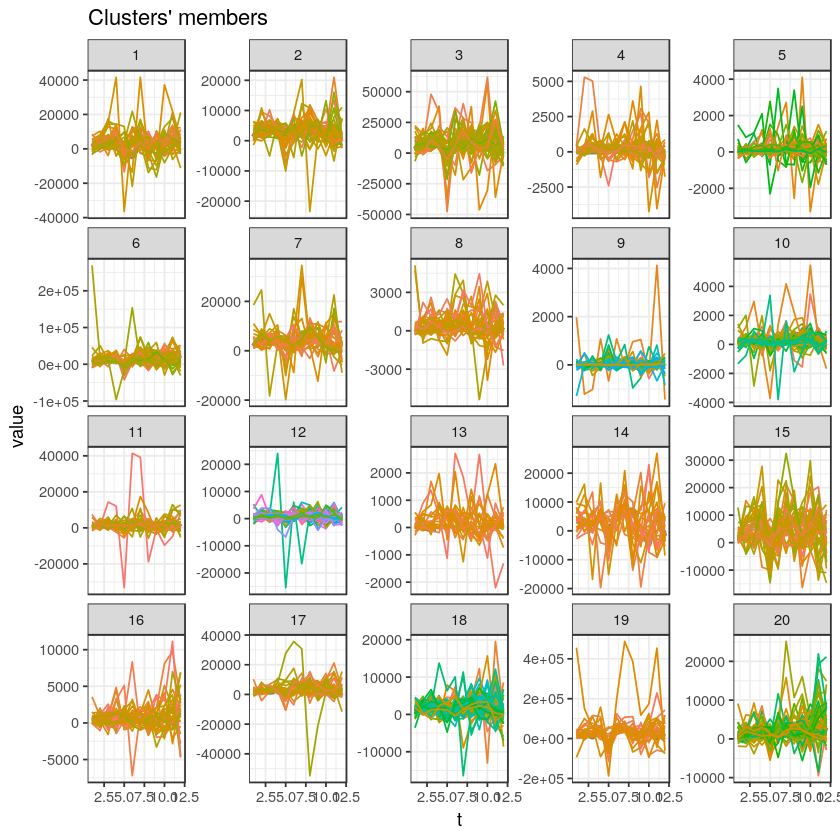

In [58]:
plot(pc)

[How to get the result of dtwclust](https://stackoverflow.com/questions/42197984/how-to-get-the-result-of-dtwclust)

In [66]:
hc.clust <- data.frame(ind = rownames(na.omit(t(data))), dtwclust = pc@cluster)
#data <- merge(sc,hc.clust, by.x = "STDR_YM_CD", by.y = "STDR_YM_CD")

In [71]:
hc.clust$ind[hc.clust$dtwclust == 6]

[1] Белгe Белгl Владe Калуe Липеe Москb Тульe Комиc Архаc Лениe Мурмc Крадe
[13] Крадg Крадh Крадl Крадn Волгl Ростe Ростh Ростl Ставe Башкh Татаc Татаg
[25] Татаh Татаm Татаn Удмуe Пермc Нижеg Оренc Самаc Самаg Сараl Сверg Тюмеh
[37] Челяg Челяh Алкрl Краяc Краяn Иркуc Иркуn Кемеe Новоe Новоg Новоn Омскe
[49] Хабаn
1155 Levels: Адыгa Адыгb Адыгc Адыгd Адыгe Адыгf Адыгg Адыгh Адыгi ... Яросo

In [61]:
ctrl <- new("dtwclustControl", trace = TRUE)

ERROR: Error in getClass(Class, where = topenv(parent.frame())): “dtwclustControl” is not a defined class


In [ ]:
hc <- tsclust(na.omit(t(data)), type = "hierarchical", k = 20L, 
              distance = "sbd", trace = TRUE,
              control = hierarchical_control(method = "average"))
plot(hc)

In [ ]:
acf_fun <- function(series, ...) {
    lapply(series, function(x) { as.numeric(acf(x, lag.max = 50L, plot = FALSE)$acf) })
}

# Autocorrelation-based fuzzy c-means
fc <- tsclust(na.omit(t(data)), type = "fuzzy", k = 5L,
              preproc = acf_fun, distance = "L2",
              seed = 123L)
fc